<a href="https://colab.research.google.com/github/maleehahassan/NNBuildingBlocksTeachingPt1/blob/main/NNBuildingblocksPt1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

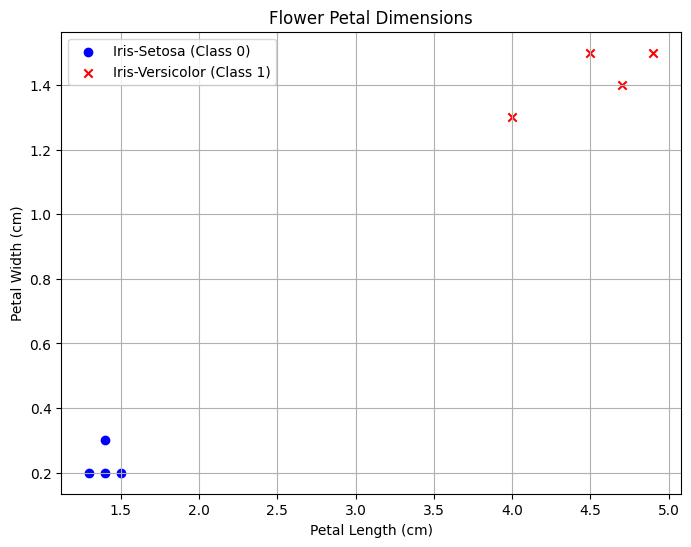

In [2]:
# The Data: X = [petal_length, petal_width], y = [species]
# Species: 0 for Iris-Setosa, 1 for Iris-Versicolor
X = np.array([
    [1.4, 0.2], [1.3, 0.2], [1.5, 0.2], [1.4, 0.3], # Iris-Setosa
    [4.7, 1.4], [4.5, 1.5], [4.9, 1.5], [4.0, 1.3]  # Iris-Versicolor
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:4, 0], X[:4, 1], color='blue', marker='o', label='Iris-Setosa (Class 0)')
plt.scatter(X[4:, 0], X[4:, 1], color='red', marker='x', label='Iris-Versicolor (Class 1)')
plt.title('Flower Petal Dimensions')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Our activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Let's initialize our Perceptron's parameters randomly
np.random.seed(42) # for reproducibility
weights = np.random.rand(2) # Two weights, one for each feature
bias = np.random.rand(1)

print(f"Initial Weights: {weights}")
print(f"Initial Bias: {bias}")

Initial Weights: [0.37454012 0.95071431]
Initial Bias: [0.73199394]


In [4]:
# Our loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

Epoch 0, Loss: 0.3308
Epoch 10, Loss: 0.1971
Epoch 20, Loss: 0.1594
Epoch 30, Loss: 0.1292
Epoch 40, Loss: 0.1058
Epoch 50, Loss: 0.0879
Epoch 60, Loss: 0.0741
Epoch 70, Loss: 0.0635
Epoch 80, Loss: 0.0551
Epoch 90, Loss: 0.0484

--- Training Finished ---
Final Weights: [0.272615   1.71421334]
Final Bias: [-1.83409626]


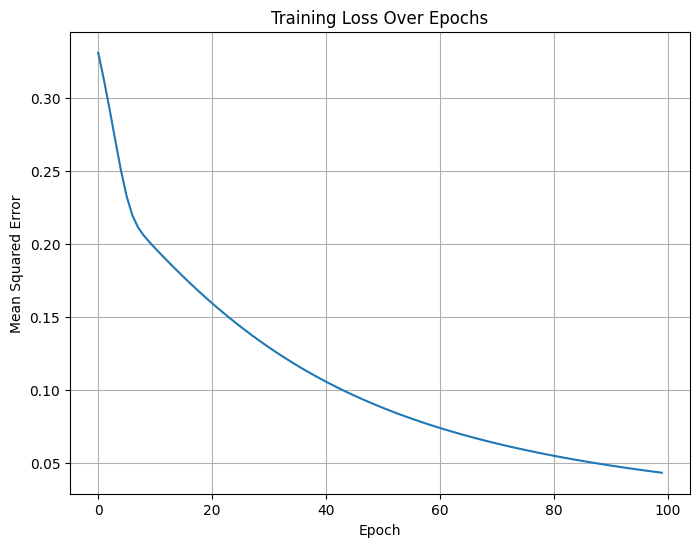

In [5]:
# Training parameters
learning_rate = 0.1
epochs = 100
losses = []

# The Training Loop
for epoch in range(epochs):
    # --- Forward Pass ---
    # 1. Make predictions
    weighted_sum = np.dot(X, weights) + bias
    predictions = sigmoid(weighted_sum)

    # 2. Calculate the loss
    loss = mean_squared_error(y, predictions)
    losses.append(loss)

    # --- Backward Pass (Simplified Gradient Descent) ---
    # 3. Calculate the error and update weights/bias
    error = y - predictions
    d_predictions = error * (predictions * (1 - predictions)) # Derivative of sigmoid

    # Calculate gradients
    d_weights = np.dot(X.T, d_predictions)
    d_bias = np.sum(d_predictions)

    # Update parameters
    weights += learning_rate * d_weights
    bias += learning_rate * d_bias

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("\n--- Training Finished ---")
print(f"Final Weights: {weights}")
print(f"Final Bias: {bias}")

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

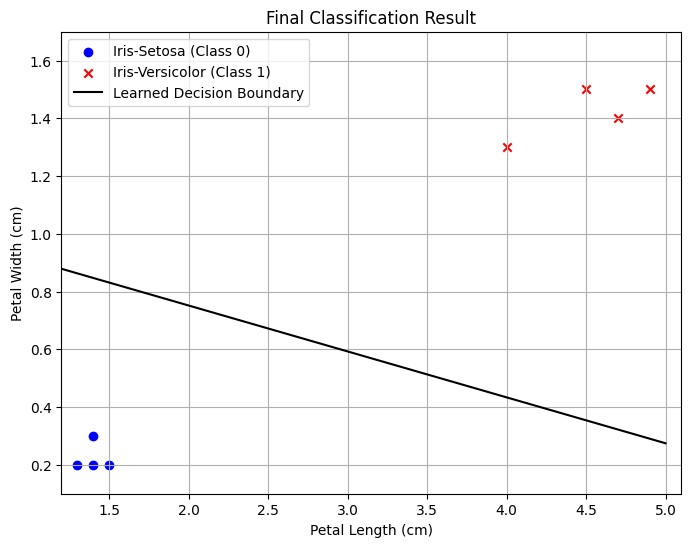

In [6]:
# Plot the original data again
plt.figure(figsize=(8, 6))
plt.scatter(X[:4, 0], X[:4, 1], color='blue', marker='o', label='Iris-Setosa (Class 0)')
plt.scatter(X[4:, 0], X[4:, 1], color='red', marker='x', label='Iris-Versicolor (Class 1)')

# Calculate and plot the decision boundary
# The line is where weighted_sum = 0, so np.dot(x, w) + b = 0
# w1*x1 + w2*x2 + b = 0  => x2 = (-w1/w2)*x1 - (b/w2)
x1_line = np.linspace(1, 5, 100)
x2_line = (-weights[0] / weights[1]) * x1_line - (bias / weights[1])

plt.plot(x1_line, x2_line, 'k-', label='Learned Decision Boundary')
plt.title('Final Classification Result')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.xlim(1.2, 5.1)
plt.ylim(0.1, 1.7)
plt.legend()
plt.grid(True)
plt.show()